In [0]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [0]:
PRED_THRED = 5

In [0]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_colwidth",-1)

In [0]:
subway = pd.read_excel('ridership.xlsx', sheet_name=0)
subway.head()

FileNotFoundError: ignored

In [0]:
subway['Period'].tail()

31    2017-08
32    2017-09
33    2017-10
34    2017-11
35    2017-12
Name: Period, dtype: object

In [0]:
subway.shape

(36, 24)

In [0]:
subway.columns

Index(['Indicator Sequence', 'Parent Sequence', 'Agency Name',
       'Indicator Name', 'Description', 'Category', 'Frequency',
       'Desired Change', 'Indicator Unit', 'Decimal Places', 'Period Year',
       'Period Month', 'YTD Target', 'YTD Actual', 'Monthly Target',
       'Monthly Actual', 'Period', 'major_incidents', 'service_delivered',
       'Average of terminal otp', 'Sum of num_sched_trips',
       'escalator availabiltiy',
       'Average of customer journey time performance',
       'Average of additional platform time'],
      dtype='object')

In [0]:
bus = pd.read_excel('ridership.xlsx', sheet_name=1)

In [0]:
bus.head()

,Indicator Sequence,Parent Sequence,Agency Name,Indicator Name,Description,Category,Frequency,Desired Change,Indicator Unit,Decimal Places,Period Year,Period Month,YTD Target,YTD Actual,Monthly Target,Monthly Actual,Period,Unnamed: 17,service_delivered,Average of average_speed
0,204143,203943,MTA Bus,Total Ridership - MTA Bus,"The number of passengers from whom the agency receives a fare, either through direct fare payment (cash, Pay-Per-Ride MetroCards, Unlimited Ride MetroCards, etc.) or fare reimbursements (senior citizens, school children, the physically disabled). Passengers who use free transfers (train-to-bus, bus-to-train, bus-to-bus) are counted as additional passengers even though they are not paying additional fares. Paratransit riders are not included. Paratransit riders are not included. Ridership data is preliminary and subject to revision as well as adjustments warranted by annual audit review.",Service Indicators,M,U,-,0,2015,1,10001377,9457874.0,10001377,9457874.0,2015-01,NaN,0.951412,10.605942
1,204143,203943,MTA Bus,Total Ridership - MTA Bus,"The number of passengers from whom the agency receives a fare, either through direct fare payment (cash, Pay-Per-Ride MetroCards, Unlimited Ride MetroCards, etc.) or fare reimbursements (senior citizens, school children, the physically disabled). Passengers who use free transfers (train-to-bus, bus-to-train, bus-to-bus) are counted as additional passengers even though they are not paying additional fares. Paratransit riders are not included. Paratransit riders are not included. Ridership data is preliminary and subject to revision as well as adjustments warranted by annual audit review.",Service Indicators,M,U,-,0,2015,2,19431798,18532556.0,9430420,9074682.0,2015-02,NaN,0.940800,10.315168
2,204143,203943,MTA Bus,Total Ridership - MTA Bus,"The number of passengers from whom the agency receives a fare, either through direct fare payment (cash, Pay-Per-Ride MetroCards, Unlimited Ride MetroCards, etc.) or fare reimbursements (senior citizens, school children, the physically disabled). Passengers who use free transfers (train-to-bus, bus-to-train, bus-to-bus) are counted as additional passengers even though they are not paying additional fares. Paratransit riders are not included. Paratransit riders are not included. Ridership data is preliminary and subject to revision as well as adjustments warranted by annual audit review.",Service Indicators,M,U,-,0,2015,3,30809338,29502815.0,11377540,10970259.0,2015-03,NaN,0.942705,10.241003
3,204143,203943,MTA Bus,Total Ridership - MTA Bus,"The number of passengers from whom the agency receives a fare, either through direct fare payment (cash, Pay-Per-Ride MetroCards, Unlimited Ride MetroCards, etc.) or fare reimbursements (senior citizens, school children, the physically disabled). Passengers who use free transfers (train-to-bus, bus-to-train, bus-to-bus) are counted as additional passengers even though they are not paying additional fares. Paratransit riders are not included. Paratransit riders are not included. Ridership data is preliminary and subject to revision as well as adjustments warranted by annual audit review.",Service Indicators,M,U,-,0,2015,4,41534958,40178689.0,10725620,10675874.0,2015-04,NaN,0.972771,10.439749
4,204143,203943,MTA Bus,Total Ridership - MTA Bus,"The number of passengers from whom the agency receives a fare, either through direct fare payment (cash, Pay-Per-Ride MetroCards, Unlimited Ride MetroCards, etc.) or fare reimbursements (senior citizens, school children, the physically disabled). Passengers who use free transfers (train-to-bus, bus-to-train, bus-to-bus) are counted as additional passengers even though they are not paying additional fares. Paratransit riders are not included. Paratransit riders are not included. Ridership data is preliminary and subject to revision as well as adjustments warranted by annual audit review.",Service Indicators,M,U,-,0,2015,5,52443784,51056639.0,10908826,10877950.0,20

In [0]:
target_cols = ['major_incidents', 'service_delivered',
       'Average of terminal otp', 'Sum of num_sched_trips',
       'escalator availabiltiy',
       'Average of customer journey time performance',
       'Average of additional platform time']

In [0]:
subway = subway.fillna('NA')
bus = bus.fillna('NA')

In [0]:
target_cols

['major_incidents',
 'service_delivered',
 'Average of terminal otp',
 'Sum of num_sched_trips',
 'escalator availabiltiy',
 'Average of customer journey time performance',
 'Average of additional platform time']

In [0]:
target_cols.append('Monthly Actual')

In [0]:
(subway[target_cols] == 'NA').sum()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


major_incidents                                 0
service_delivered                               0
Average of terminal otp                         0
Sum of num_sched_trips                          0
escalator availabiltiy                          0
Average of customer journey time performance    0
Average of additional platform time             0
Monthly Actual                                  0
dtype: int64

In [0]:
%matplotlib inline

In [0]:
def plot_ts(data, cols):
    plt.rcParams["figure.figsize"] = (12,8)
    data_temp = data.copy()
    data_temp['ts'] = data_temp['Period'].apply(lambda x: str(datetime.strptime(x, '%Y-%m')))
    
    for col in cols:
        plt.plot(data_temp['Period'], data_temp[col])
    plt.legend(cols)
    plt.xticks(rotation=90)
    plt.show()

In [0]:
plt.rcParams["figure.figsize"] = (12,8)

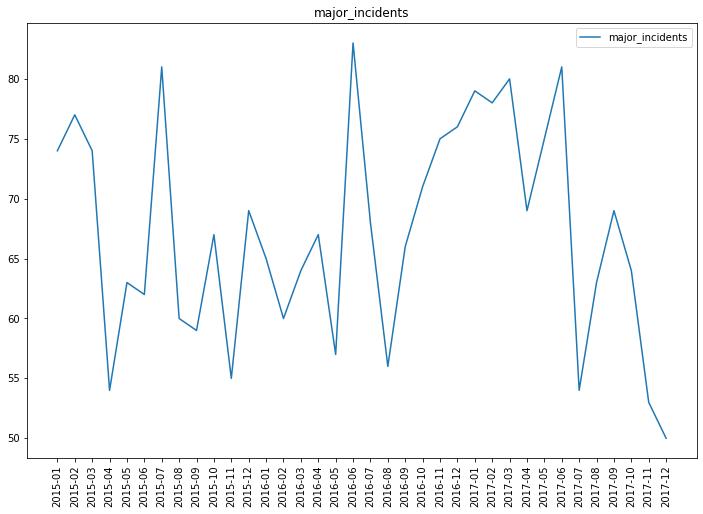

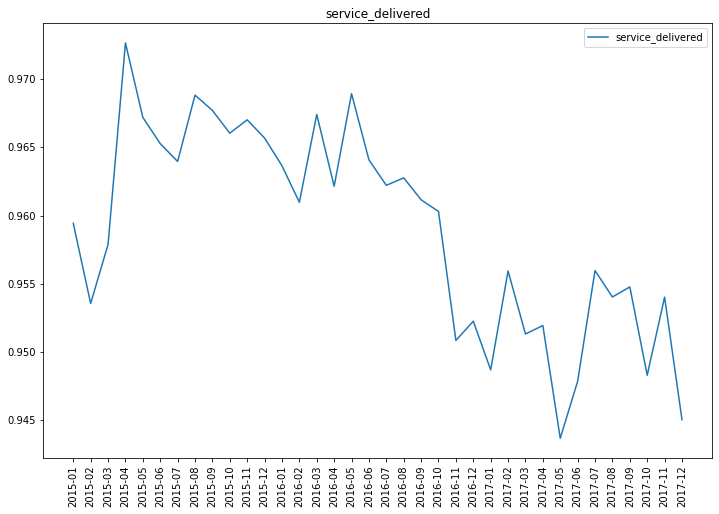

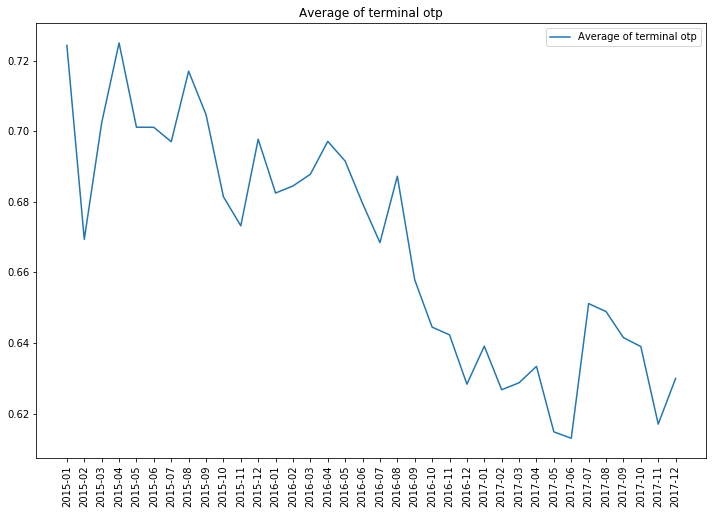

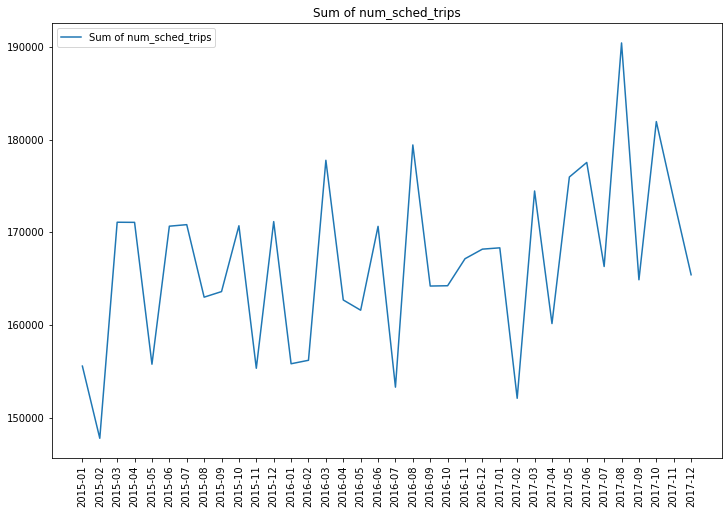

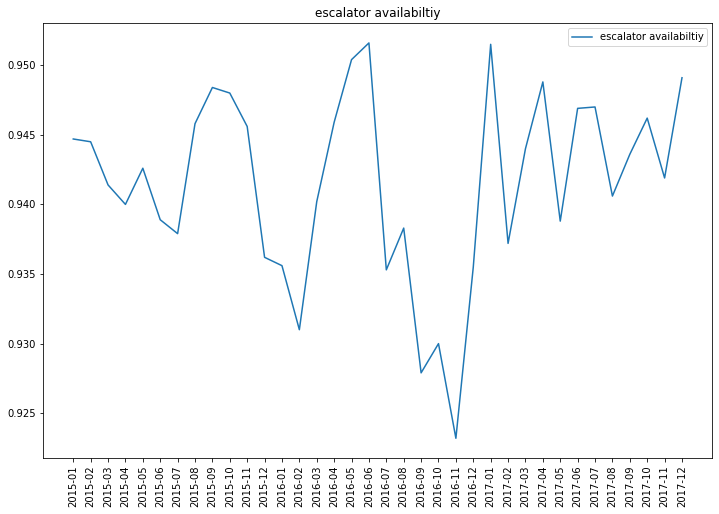

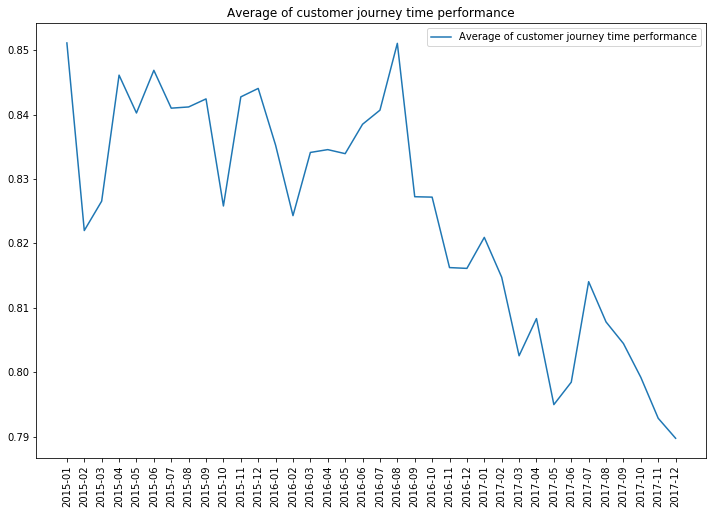

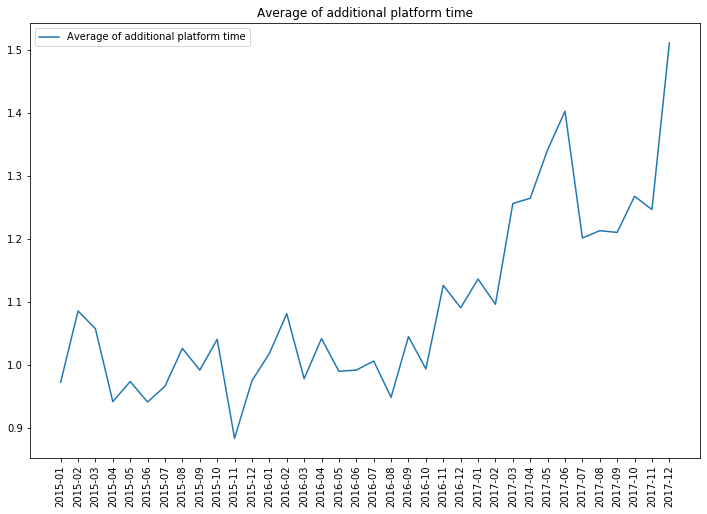

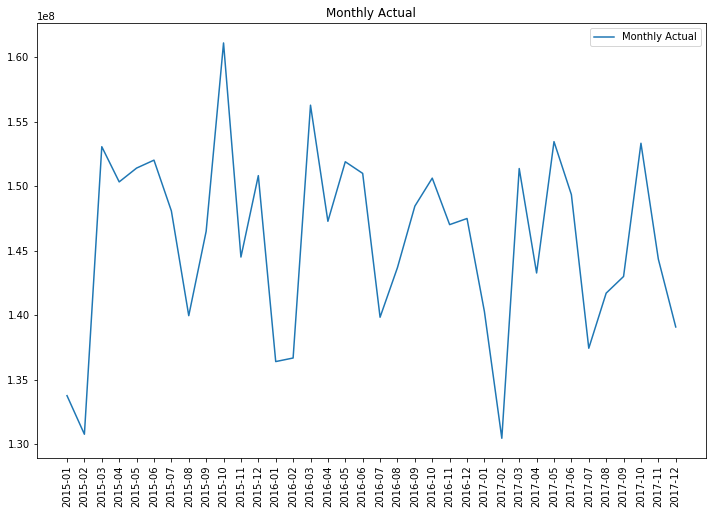

In [0]:
for col in target_cols:
    plt.title(col)
    plot_ts(subway, [col])

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
temp_subway = subway[target_cols].copy()
scaler.fit(temp_subway)
temp_subway = scaler.transform(temp_subway)
temp_subway = pd.DataFrame(temp_subway, columns=target_cols)
temp_subway['Period'] = subway['Period']

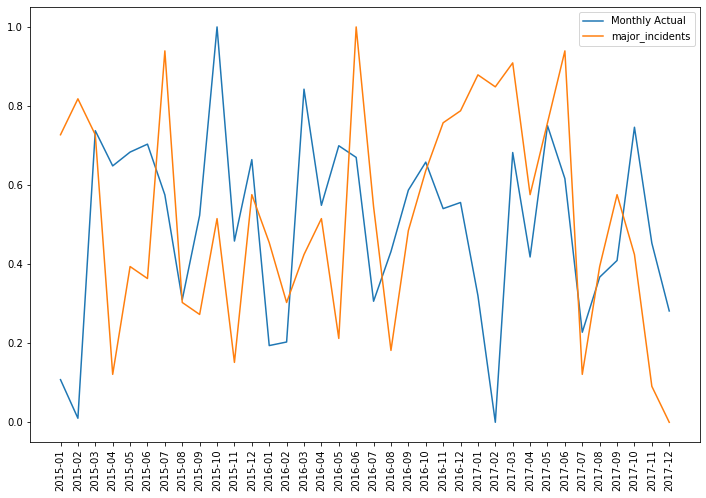

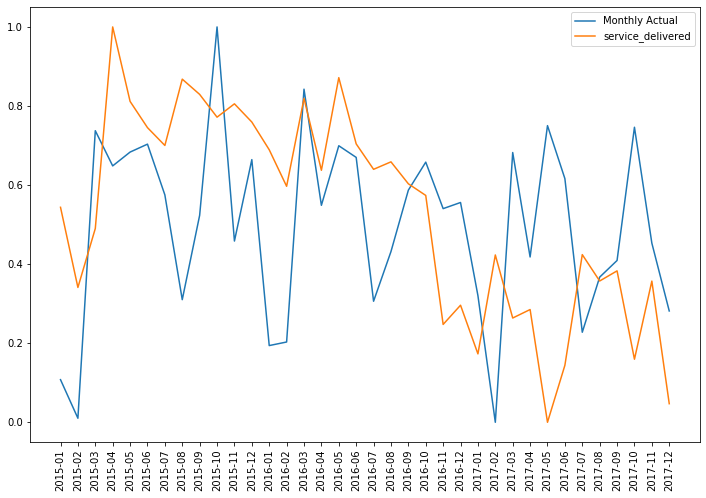

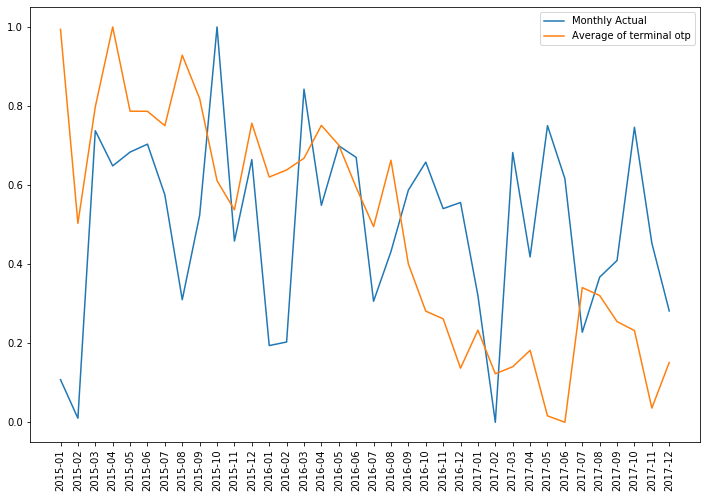

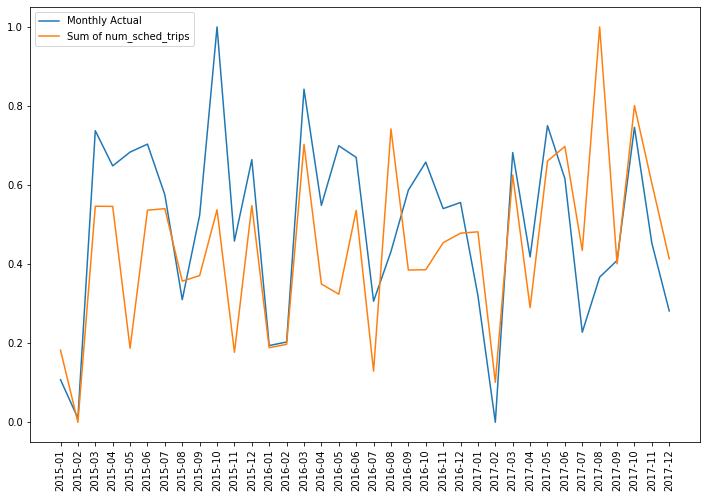

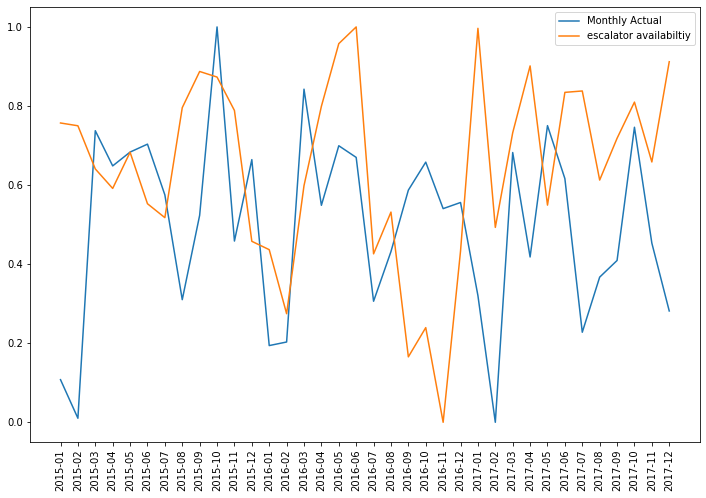

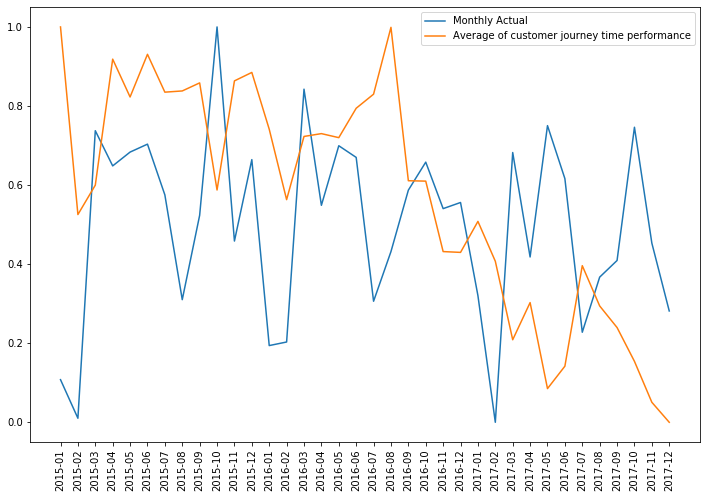

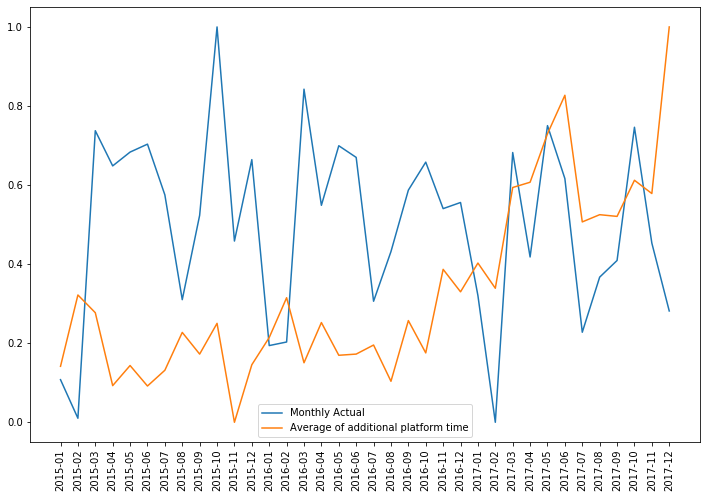

In [0]:
for _ in target_cols:
    if _ != 'Monthly Actual':
        plot_ts(temp_subway, ['Monthly Actual', _])

### Linear Regression Subway Ridership

In [0]:
subway_train = subway.iloc[:-PRED_THRED]
print(subway_train.shape)
subway_test = subway.iloc[-PRED_THRED:]
print(subway_test.shape)

(31, 24)
(5, 24)


In [0]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
temp_cols = target_cols[:]
temp_cols.remove('Monthly Actual')
x = subway_train[temp_cols]
y = subway_train['Monthly Actual']
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Monthly Actual   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     7.315
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           0.000117
Time:                        10:26:17   Log-Likelihood:                -516.02
No. Observations:                  31   AIC:                             1048.
Df Residuals:                      23   BIC:                             1060.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [0]:
subway_test = sm.add_constant(subway_test)
subway_test.shape

(5, 24)

In [0]:
temp_cols = target_cols[:]
temp_cols.remove('Monthly Actual')
x_test = subway_test[temp_cols]
x_test2 = sm.add_constant(x_test)
y_test = subway_test['Monthly Actual']

In [0]:
y_test_pred = [round(_) for _ in list(est2.predict(x_test2))]
y_test_pred

[162342269, 148430612, 155332376, 155488842, 135971424]

In [0]:
list(y_test)

[141721056, 143012669, 153344574, 144357826, 139097559]

In [0]:
data_tuples = list(zip(subway_test['Period'], y_test, y_test_pred))
pred_res = pd.DataFrame(data_tuples, columns=['Period', 'actual', 'Prediction'])
pred_res['diff'] = pred_res['actual'] - pred_res['Prediction']
pred_res['diff_pct'] = (pred_res['diff'] / pred_res['actual']).apply(lambda x: str(round(x, 2) * 100) + '%')
pred_res

,Period,actual,Prediction,diff,diff_pct
0,2017-08,141721056,162342269,-20621213,-15.0%
1,2017-09,143012669,148430612,-5417943,-4.0%
2,2017-10,153344574,155332376,-1987802,-1.0%
3,2017-11,144357826,155488842,-11131016,-8.0%
4,2017-12,139097559,135971424,3126135,2.0%


### Multicollinearity

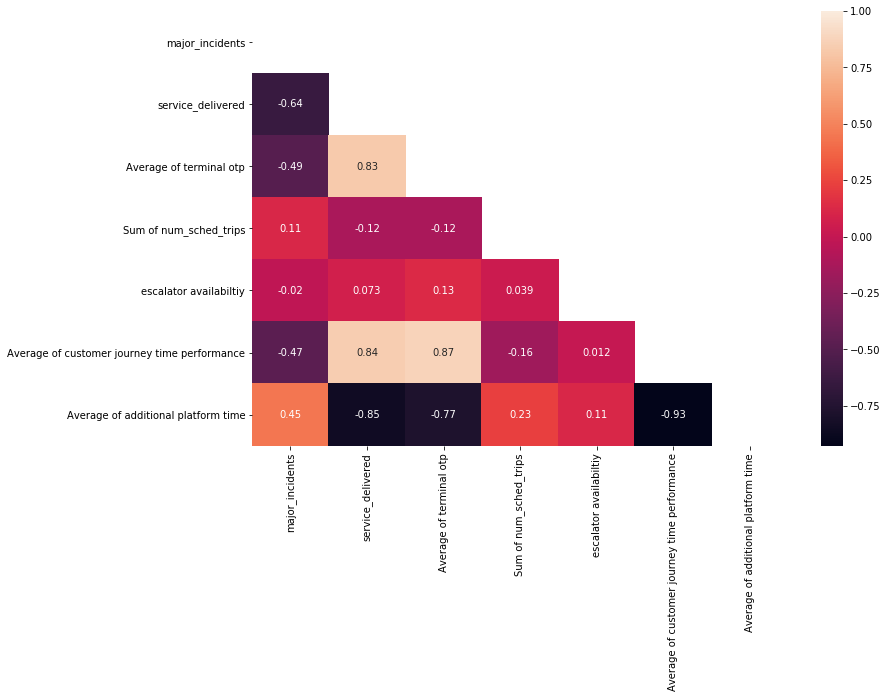

In [0]:
import seaborn as sns
x = subway_train[temp_cols].copy()
matrix = np.triu(x.corr())
sns.heatmap(x.corr(), annot=True, mask=matrix)

In [0]:
from numpy import linalg as LA
a = x.transpose() @ x
w, v = LA.eig(a)
w

array([8.48695885e+11, 2.52114929e+03, 3.60930880e-01, 2.48741798e-01,
       7.28347492e-03, 4.51833379e-04, 8.53552857e-04])

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["VIF Factor Root"] = vif["VIF Factor"].apply(lambda x: x**0.5)
vif["condition number k"] = max(w) / w
vif["features"] = x.columns
vif.round(1)

,VIF Factor,VIF Factor Root,condition number k,features
0,88.2,9.4,1.000000e+00,major_incidents
1,35511.8,188.4,3.366306e+08,service_delivered
2,1688.7,41.1,2.351408e+12,Average of terminal otp
3,446.1,21.1,3.411955e+12,Sum of num_sched_trips
4,22388.4,149.6,1.165235e+14,escalator availabiltiy
5,28523.1,168.9,1.878338e+15,Average of customer journey time performance
6,461.4,21.5,9.943097e+14,Average of additional platform time


### Manual Calculation

In [0]:
temp_cols = target_cols[:]
temp_cols.remove('Monthly Actual')
x = subway_train[temp_cols].copy()
x.loc[:, 'const'] = 1
y = subway_train['Monthly Actual']

n, p = x.shape
k = p - 1
xt = x.transpose()
xtx = xt @ x
inxtx = pd.DataFrame(np.linalg.inv(xtx.values), xtx.columns, xtx.index)

B = inxtx @ xt @ y 

y_hat = x @ B

e = y - y_hat

In [0]:
B

major_incidents                                 1.276703e+05
service_delivered                               6.683371e+08
Average of terminal otp                         2.847127e+07
Sum of num_sched_trips                          6.629288e+02
escalator availabiltiy                          3.897726e+07
Average of customer journey time performance   -5.157932e+08
Average of additional platform time            -3.780449e+07
const                                          -2.021577e+08
dtype: float64

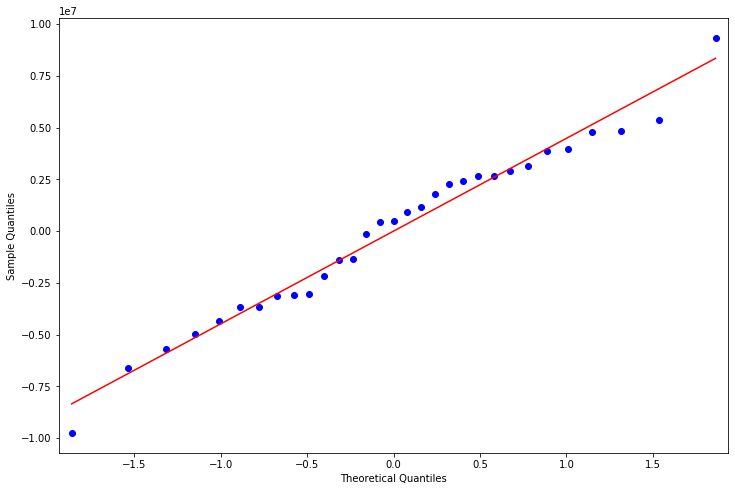

In [0]:
fig = sm.qqplot(e, line='r')
plt.show()

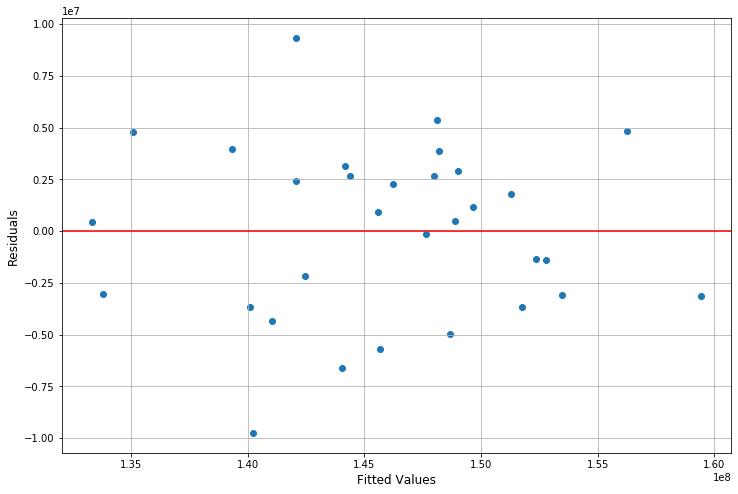

In [0]:
# residentals visually
fig, ax = plt.subplots()
ax.scatter(y_hat,e)
ax.set_xlabel(r'Fitted Values', fontsize=12)
ax.set_ylabel(r'Residuals', fontsize=12)
ax.grid(True)
plt.axhline(y=0, color='r', linestyle='-')

In [0]:
H = x @ inxtx @ xt
h = H.to_numpy().diagonal()
SSres = y.transpose() @ y - B @ xt @ y
MSres = SSres / (n-p)
s_r = e / (MSres*(1-h))**0.5

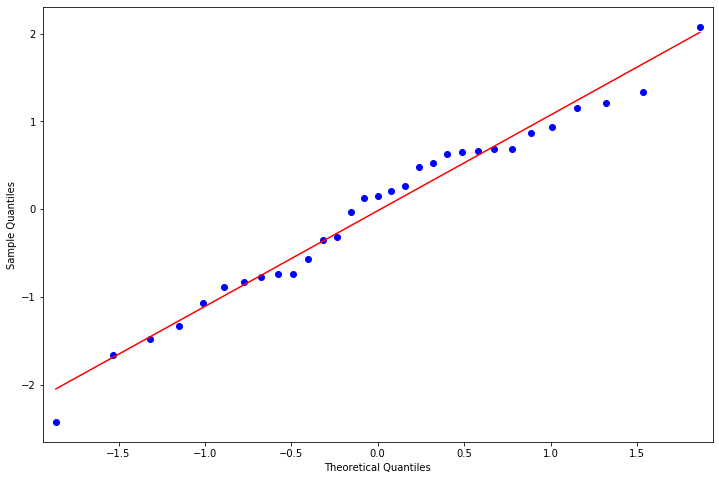

In [0]:
fig = sm.qqplot(s_r, line='r')
plt.show()

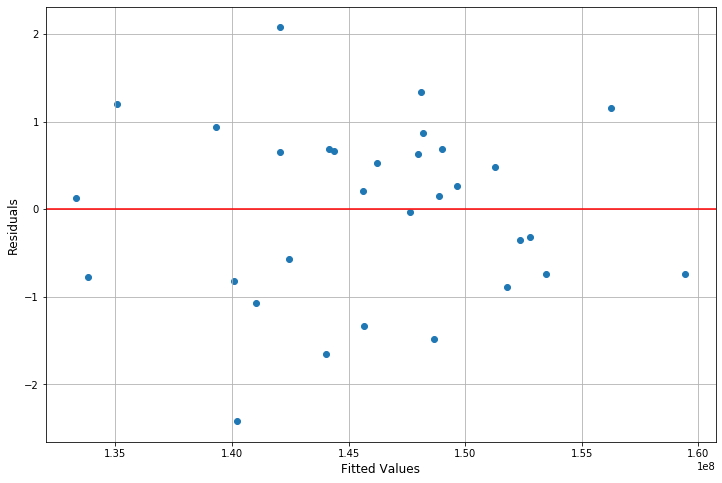

In [0]:
fig, ax = plt.subplots()
ax.scatter(y_hat, s_r)
ax.set_xlabel(r'Fitted Values', fontsize=12)
ax.set_ylabel(r'Residuals', fontsize=12)
ax.grid(True)
plt.axhline(y=0, color='r', linestyle='-')

### Linear Regression Subway Ridership

In [0]:
bus.shape

(36, 20)

In [0]:
bus_processed = bus[['Period', 'Monthly Actual']]
bus_processed = bus_processed.merge(subway, on='Period', suffixes=['', '_'])
bus_train = bus_processed.iloc[:-PRED_THRED]
print(bus_train.shape)
bus_test = bus_processed.iloc[-PRED_THRED:]
print(bus_test.shape)

(31, 25)
(5, 25)


In [0]:
temp_cols = target_cols[:]
temp_cols.remove('Monthly Actual')
x = bus_train[temp_cols]
y = bus_train['Monthly Actual']
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Monthly Actual   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     6.965
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           0.000167
Time:                        12:24:46   Log-Likelihood:                -437.82
No. Observations:                  31   AIC:                             891.6
Df Residuals:                      23   BIC:                             903.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [0]:
bus_test = sm.add_constant(bus_test)
bus_test.shape

(5, 25)

In [0]:
temp_cols = target_cols[:]
temp_cols.remove('Monthly Actual')
x_test = bus_test[temp_cols]
x_test2 = sm.add_constant(x_test)
y_test = bus_test['Monthly Actual']

In [0]:
list(y_test)

[10182683.0, 10293093.0, 10879804.0, 10230691.0, 9592517.0]

In [0]:
y_test_pred = [round(_) for _ in list(est2.predict(x_test2))]
y_test_pred

[11632757, 10514643, 11059183, 11167938, 9611701]

In [0]:
data_tuples = list(zip(bus_test['Period'], y_test, y_test_pred))
pred_res = pd.DataFrame(data_tuples, columns=['Period', 'actual', 'Prediction'])
pred_res['diff'] = pred_res['actual'] - pred_res['Prediction']
pred_res['diff_pct'] = (pred_res['diff'] / pred_res['actual']).apply(lambda x: str(round(x, 2) * 100) + '%')
pred_res

,Period,actual,Prediction,diff,diff_pct
0,2017-08,10182683.0,11632757,-1450074.0,-14.000000000000002%
1,2017-09,10293093.0,10514643,-221550.0,-2.0%
2,2017-10,10879804.0,11059183,-179379.0,-2.0%
3,2017-11,10230691.0,11167938,-937247.0,-9.0%
4,2017-12,9592517.0,9611701,-19184.0,-0.0%


In [0]:
temp_cols = target_cols[:]
temp_cols.remove('Monthly Actual')
x = bus_train[temp_cols].copy()
x.loc[:, 'const'] = 1
y = bus_train['Monthly Actual']

n, p = x.shape
k = p - 1
xt = x.transpose()
xtx = xt @ x
inxtx = pd.DataFrame(np.linalg.inv(xtx.values), xtx.columns, xtx.index)

B = inxtx @ xt @ y 

y_hat = x @ B

e = y - y_hat

In [0]:
B

major_incidents                                 3.085916e+03
service_delivered                               5.258871e+07
Average of terminal otp                         1.497104e+06
Sum of num_sched_trips                          5.122676e+01
escalator availabiltiy                          1.526372e+06
Average of customer journey time performance   -3.859384e+07
Average of additional platform time            -3.058368e+06
const                                          -1.600766e+07
dtype: float64

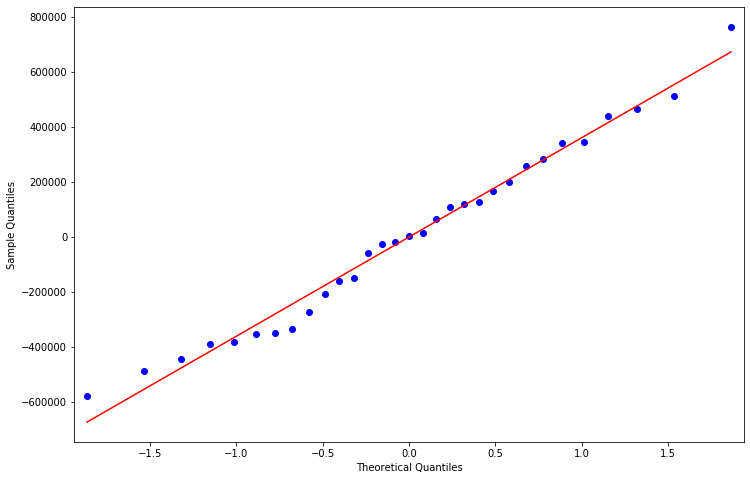

In [0]:
fig = sm.qqplot(e, line='r')
plt.show()

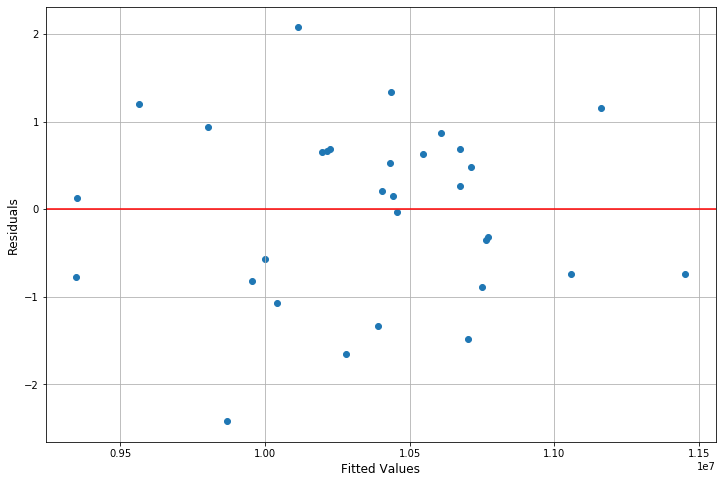

In [0]:
fig, ax = plt.subplots()
ax.scatter(y_hat, s_r)
ax.set_xlabel(r'Fitted Values', fontsize=12)
ax.set_ylabel(r'Residuals', fontsize=12)
ax.grid(True)
plt.axhline(y=0, color='r', linestyle='-')

In [0]:
H = x @ inxtx @ xt
h = H.to_numpy().diagonal()
SSres = y.transpose() @ y - B @ xt @ y
MSres = SSres / (n-p)
s_r = e / (MSres*(1-h))**0.5

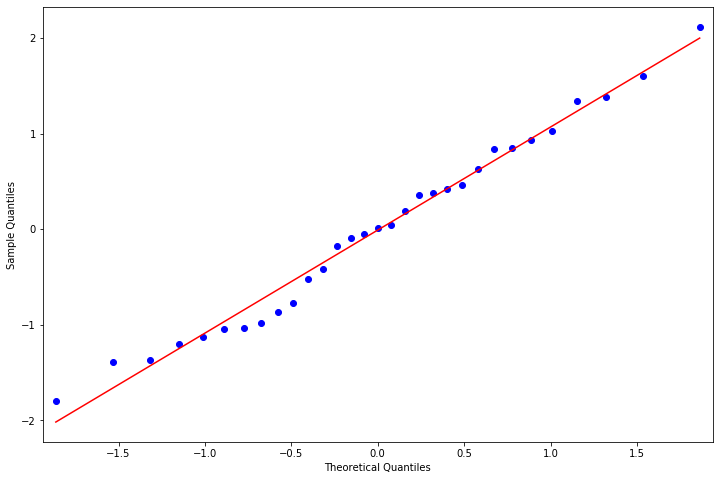

In [0]:
fig = sm.qqplot(s_r, line='r')
plt.show()

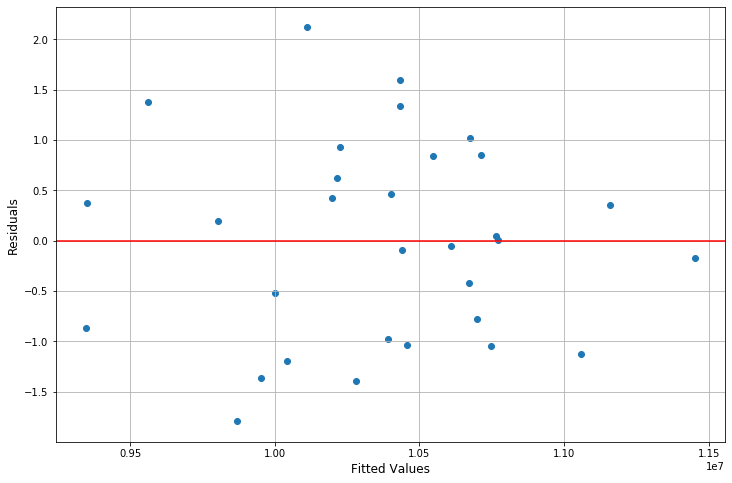

In [0]:
fig, ax = plt.subplots()
ax.scatter(y_hat, s_r)
ax.set_xlabel(r'Fitted Values', fontsize=12)
ax.set_ylabel(r'Residuals', fontsize=12)
ax.grid(True)
plt.axhline(y=0, color='r', linestyle='-')